Goal: Figure out time after first template tweet until something trended 

In [2]:
from imports import *
%load_ext autoreload
%autoreload 2


In [50]:
campaigns = preprocessing.load_campaign()

In [99]:
res_dict = {}
trending_thresh = 10
for ht, tweets in campaigns.items():
    if ht not in preprocessing.bandwagon_hashtags and ht not in preprocessing.never_trended:
        for t in sorted(tweets.values(), key=lambda x: x['date']):
            if t['retweet_from'] == '' and t['template'] != '':
                print('Hashtag', ht)
                print('first template at time', t['date'])
                f_name = os.path.join(TRENDS_DIR, ht+'_country_trending.pkl')
                trending_data = pd.read_pickle(f_name)
                trending_data = trending_data[trending_data.within_group_ranking <= trending_thresh]
                print('began trending:', trending_data.datetime.min())
                res_dict[ht] = (t['date'], trending_data.datetime.min())
                break

Hashtag jharkhandwithmodi
first template at time 2019-02-17 06:18:10
began trending: 2019-02-17 11:00:00
Hashtag surgingsilk
first template at time 2019-02-09 12:28:00
began trending: 2019-02-09 13:00:00
Hashtag merapmmeraabhimaan
first template at time 2018-11-11 04:53:09
began trending: 2018-11-11 06:00:00
Hashtag kiamadeinap
first template at time 2019-01-28 17:40:14
began trending: NaT
Hashtag dousupportnaxals
first template at time 2018-09-04 09:24:48
began trending: NaT
Hashtag mizoramwithmodi
first template at time 2018-11-23 05:24:36
began trending: NaT
Hashtag timesofrahul
first template at time 2019-04-22 03:09:00
began trending: NaT
Hashtag threadsofexcellence
first template at time 2019-01-06 11:57:00
began trending: 2019-01-06 13:00:00
Hashtag msmetextilesconclave
first template at time 2019-02-13 05:58:00
began trending: NaT
Hashtag bjp4jind
first template at time 2019-01-27 04:20:00
began trending: NaT
Hashtag म्हारा_वोट_भाजपा_को
first template at time 2018-12-05 04:48:3

In [100]:
time_to_trend = []
for ht, tup in res_dict.items():
    first_template, first_trending = tup
    try:
        minutes = int((first_trending - first_template).seconds/60)
        time_to_trend.append(minutes)
    except:
        continue


In [95]:
print('mean time to trend to at least level', trending_thresh, 'is', np.mean(time_to_trend))
print('median time to trend to at least level', trending_thresh, 'is', np.median(time_to_trend))

mean time to trend to at least level 50 is 166.3709677419355
median time to trend to at least level 50 is 67.0


In [98]:
print('mean time to trend to at least level', trending_thresh, 'is', np.mean(time_to_trend))
print('median time to trend to at least level', trending_thresh, 'is', np.median(time_to_trend))

mean time to trend to at least level 25 is 136.12244897959184
median time to trend to at least level 25 is 76.0


In [101]:
print('mean time to trend to at least level', trending_thresh, 'is', np.mean(time_to_trend))
print('median time to trend to at least level', trending_thresh, 'is', np.median(time_to_trend))

mean time to trend to at least level 10 is 148.70967741935485
median time to trend to at least level 10 is 76.0


In [78]:
bins = [0,10,20,30,40,50,60,90,120,240,360]

Text(0.5, 1.0, 'Minutes Until Trending at level 50')

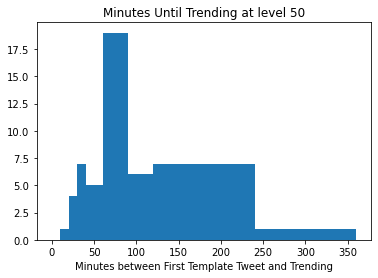

In [80]:
plt.hist(time_to_trend, bins=bins)
plt.xlabel('Minutes between First Template Tweet and Trending')
plt.title('Minutes Until Trending at level ' + str(trending_thresh))

In [88]:
print('mean time to trend to at least level', trending_thresh, 'is', np.mean(time_to_trend))

mean time to trend to at least level 10 is 148.70967741935485


Text(0.5, 1.0, 'Minutes Until Trending at level 25')

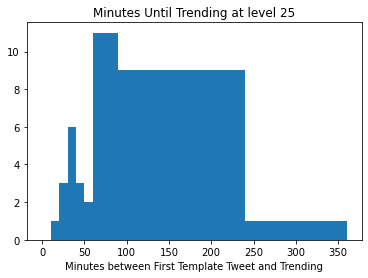

In [83]:
plt.hist(time_to_trend, bins=bins)
plt.xlabel('Minutes between First Template Tweet and Trending')
plt.title('Minutes Until Trending at level ' + str(trending_thresh))

Text(0.5, 1.0, 'Minutes Until Trending at level 10')

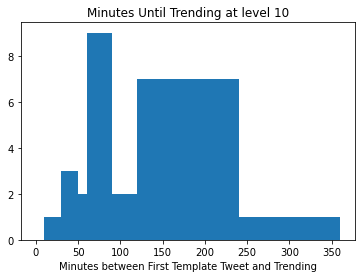

In [86]:
plt.hist(time_to_trend, bins=bins)
plt.xlabel('Minutes between First Template Tweet and Trending')
plt.title('Minutes Until Trending at level ' + str(trending_thresh))